<a href="https://colab.research.google.com/github/alawiiii99/ali.project/blob/main/Bone_fraction_classification_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/BoneFraction/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/BoneFraction/test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/BoneFraction/train/fractured')))
print(len(os.listdir('/content/drive/MyDrive/BoneFraction/train/notfractured')))
print(len(os.listdir('/content/drive/MyDrive/BoneFraction/test/fractured')))
print(len(os.listdir('/content/drive/MyDrive/BoneFraction/test/notfractured')))

504
715
238
262


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 976 images belonging to 2 classes.
Found 243 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [7]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
31/31 [==============================] - 361s 11s/step - loss: 0.9693 - accuracy: 0.6506 - val_loss: 0.3093 - val_accuracy: 0.9053
Epoch 2/3
31/31 [==============================] - 305s 10s/step - loss: 0.6335 - accuracy: 0.7100 - val_loss: 0.4111 - val_accuracy: 0.7366
Epoch 3/3
31/31 [==============================] - 304s 10s/step - loss: 0.3260 - accuracy: 0.8525 - val_loss: 0.2380 - val_accuracy: 0.9877


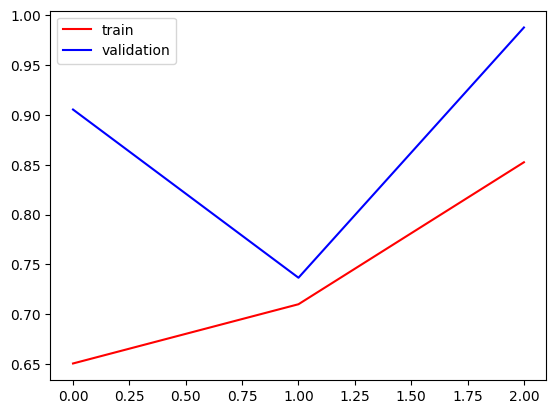

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

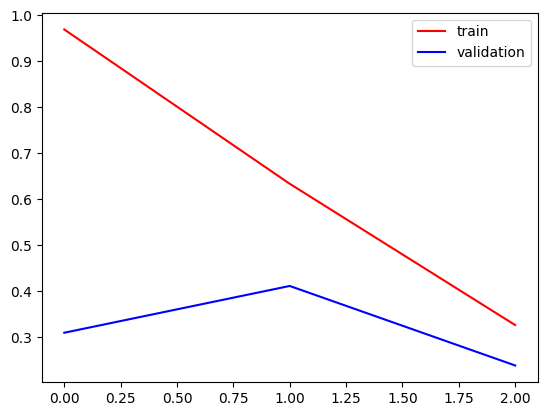

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

16/16 [==============================] - 130s 8s/step
[[1.63072180e-02]
 [6.98068559e-01]
 [7.60993481e-01]
 [1.37123749e-01]
 [1.53399393e-01]
 [1.77677765e-01]
 [7.99637973e-01]
 [6.07017219e-01]
 [4.59266305e-02]
 [7.21757650e-01]
 [1.77677765e-01]
 [2.43047535e-01]
 [5.65845251e-01]
 [1.62417591e-01]
 [6.51797295e-01]
 [6.63652778e-01]
 [1.33032445e-03]
 [2.05587983e-01]
 [1.93873653e-04]
 [6.55633032e-01]
 [7.54097760e-01]
 [5.24602160e-02]
 [3.53309989e-01]
 [4.67367619e-01]
 [7.72245347e-01]
 [2.99665123e-01]
 [7.07028985e-01]
 [6.52934253e-01]
 [7.50343949e-02]
 [1.29396498e-01]
 [4.79398400e-01]
 [6.40369717e-06]
 [5.25467098e-01]
 [2.02943608e-01]
 [7.28192210e-01]
 [2.15267688e-01]
 [7.10276008e-01]
 [6.42463326e-01]
 [1.03962071e-01]
 [7.80088723e-01]
 [1.58676118e-01]
 [1.29396498e-01]
 [1.78082439e-03]
 [7.85537601e-01]
 [1.71674818e-01]
 [7.41853893e-01]
 [7.39678085e-01]
 [7.94445634e-01]
 [4.39643174e-01]
 [7.29042411e-01]
 [5.53795695e-02]
 [7.60825276e-01]
 [7.034837

In [13]:
len(predictions)

500

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[133 105]
 [149 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.56      0.51       238
           1       0.52      0.43      0.47       262

    accuracy                           0.49       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.50      0.49      0.49       500

